# `mop` on synth, $p=1$

In [1]:
p=1

In [2]:
# Load datasets using base R
checkerboard_data <- read.csv("checkerboard_data.csv")
halfmoon_data <- read.csv("halfmoon_Scurve_data.csv")
maf_moon_data <- read.csv("maf_moon_ring_data.csv")

# Create matrices
X1 <- as.matrix(checkerboard_data[, c("X1", "X2")])
Y1 <- as.matrix(checkerboard_data[, c("Y1", "Y2")])

X2 <- as.matrix(maf_moon_data[, c("X1", "X2")])
Y2 <- as.matrix(maf_moon_data[, c("Y1", "Y2")])

X3 <- as.matrix(halfmoon_data[, c("X1", "X2")])
Y3 <- as.matrix(halfmoon_data[, c("Y1", "Y2")])

## checkerboard

In [3]:
#create multiscale decompsotions
library(gmra)
gmra1a = gmra.create.ipca(X=X1, eps=0, d=2, maxKids=2)
gmra2a = gmra.create.ipca(X=Y1, eps=0, d=2, maxKids=2)

In [4]:
#setup and solve multiscale lp
library(mop)
trp.lp <- multiscale.transport.create.lp(oType=31, transport.type=0, massCost=0, lambda=1)
icprop <- multiscale.transport.create.iterated.capacity.propagation.strategy(1, 0)
multiscale.transport.set.propagation.strategy.1(trp.lp, icprop);
multiscale.transport.add.expand.neighborhood.strategy(trp.lp, 1 )

Loading required package: RColorBrewer

Loading required package: data.table



In [5]:
time1 <- system.time( 
    trp1 <- multiscale.transport.solve(trp.lp, gmra1a, gmra2a, p = p, nType=0, dType=1, scaleMass=FALSE) )

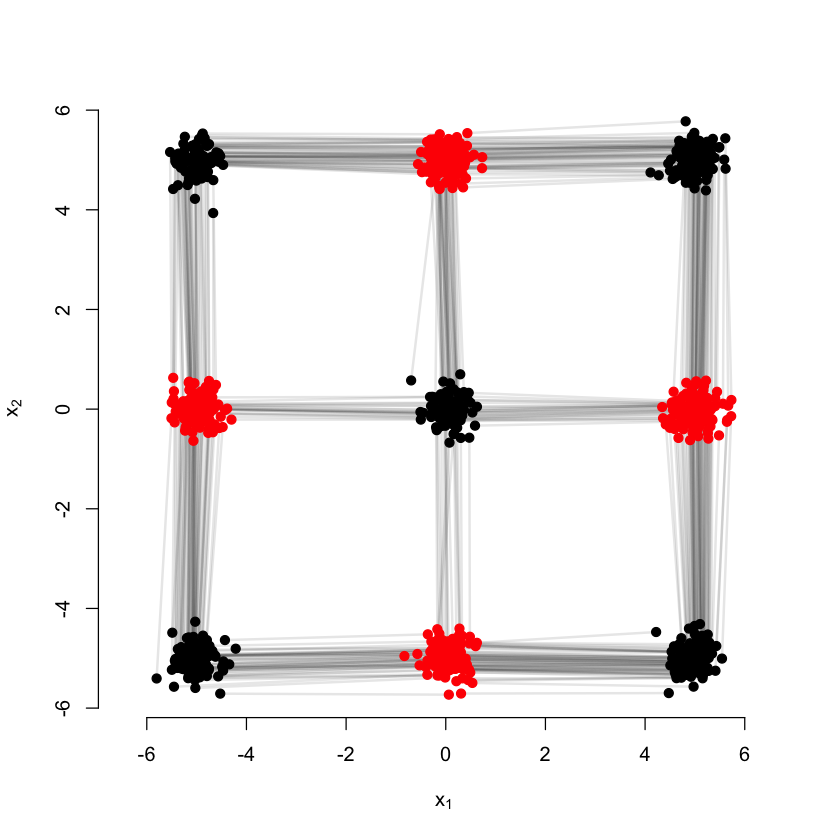

In [6]:
multiscale.transport.plot.map(trp1, 100, mapAlpha=0.1)

In [7]:
num_maps1 <- length(trp1$map)
finest_map1 <- trp1$map[[num_maps1]]
write.csv(finest_map1, file = "mop_map1_p1.csv", row.names = FALSE)

In [8]:
all_distances <- matrix(0, nrow = nrow(X1), ncol = nrow(Y1))

for (i in 1:nrow(X1)) {
  for (j in 1:nrow(Y1)) {
    all_distances[i, j] <- sqrt(sum((X1[i,] - Y1[j,])^2))
  }
}

max_distance <- max(all_distances)

map = finest_map1

# Vectorized approach
i_indices <- map[, 1]
j_indices <- map[, 2]
weights <- map[, 3]

# Calculate all distances
distances <- sqrt(rowSums((X1[i_indices,] - Y1[j_indices,])^2))

# Calculate weighted sum
weighted_sum <- sum(weights * distances) / (512 * max_distance)

print(paste("MOP (p=1) checkerboard cost:", weighted_sum))

[1] "MOP (p=1) checkerboard cost: 0.578290956577104"


## maf moon ring

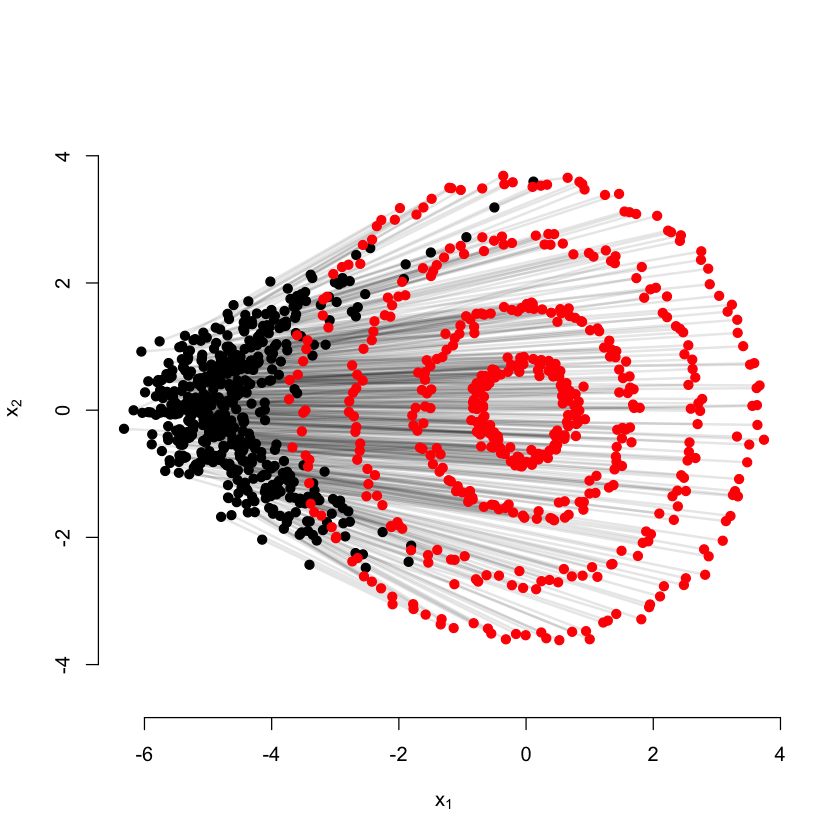

In [9]:
gmra1b = gmra.create.ipca(X=X2, eps=0, d=2, maxKids=2)
gmra2b = gmra.create.ipca(X=Y2, eps=0, d=2, maxKids=2)

time2 <- system.time( 
    trp2 <- multiscale.transport.solve(trp.lp, gmra1b, gmra2b, p = p, nType=0, dType=1, scaleMass=FALSE) )

multiscale.transport.plot.map(trp2, 100, mapAlpha=0.1)

In [10]:
num_maps2 <- length(trp2$map)
finest_map2 <- trp2$map[[num_maps2]]
write.csv(finest_map2, file = "mop_map2_p1.csv", row.names = FALSE)

In [11]:
all_distances <- matrix(0, nrow = nrow(X2), ncol = nrow(Y2))

for (i in 1:nrow(X2)) {
  for (j in 1:nrow(Y2)) {
    all_distances[i, j] <- sqrt(sum((X2[i,] - Y2[j,])^2))
  }
}

max_distance <- max(all_distances)

map = finest_map2

# Vectorized approach
i_indices <- map[, 1]
j_indices <- map[, 2]
weights <- map[, 3]

# Calculate all distances
distances <- sqrt(rowSums((X2[i_indices,] - Y2[j_indices,])^2))

# Calculate weighted sum
weighted_sum <- sum(weights * distances) / (512 * max_distance)

print(paste("MOP (p=1) maf moon cost:", weighted_sum))

[1] "MOP (p=1) maf moon cost: 0.495991317654468"


## halfmoon

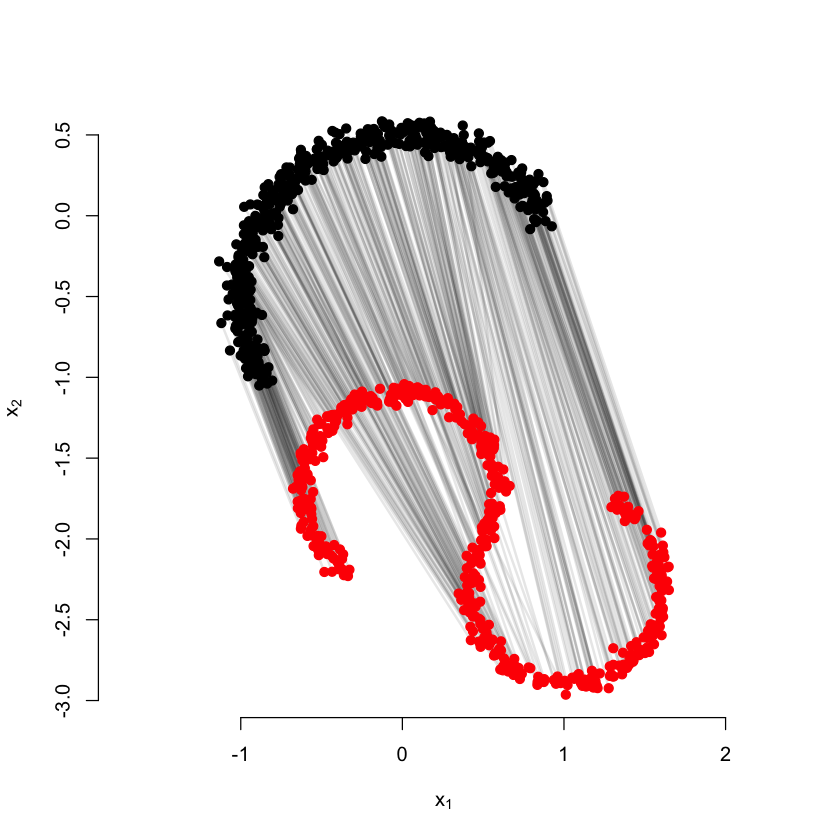

In [12]:
gmra1c = gmra.create.ipca(X=X3, eps=0, d=2, maxKids=2)
gmra2c = gmra.create.ipca(X=Y3, eps=0, d=2, maxKids=2)

time3 <- system.time( 
    trp3 <- multiscale.transport.solve(trp.lp, gmra1c, gmra2c, p = p, nType=0, dType=1, scaleMass=FALSE) )

multiscale.transport.plot.map(trp3, 100, mapAlpha=0.1)

In [13]:
num_maps3 <- length(trp3$map)
finest_map3 <- trp3$map[[num_maps3]]
write.csv(finest_map3, file = "mop_map3_p1.csv", row.names = FALSE)

In [14]:
all_distances <- matrix(0, nrow = nrow(X3), ncol = nrow(Y3))

for (i in 1:nrow(X3)) {
  for (j in 1:nrow(Y3)) {
    all_distances[i, j] <- sqrt(sum((X3[i,] - Y3[j,])^2))
  }
}

max_distance <- max(all_distances)

map = finest_map3

# Vectorized approach
i_indices <- map[, 1]
j_indices <- map[, 2]
weights <- map[, 3]

# Calculate all distances
distances <- sqrt(rowSums((X3[i_indices,] - Y3[j_indices,])^2))

# Calculate weighted sum
weighted_sum <- sum(weights * distances) / (512 * max_distance)

print(paste("MOP (p=1) halfmoon cost:", weighted_sum))

[1] "MOP (p=1) halfmoon cost: 0.599163030400063"
